In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import data as DataFrame
reviews = pd.read_csv('/Users/dwalkerpage/Documents/Data_Science/Springboard/Projects/springboard/Capstone_Projects/Capstone_Project_1/Capstone_Project_1_Data/restaurant_reviews_final.csv')

In [3]:
reviews.head()

,business_id,stars,text
0,EXAbfr5PkoRzMqlCb_3ALQ,5.0,We were in town from San Francisco to visit fr...
1,6sOBPz69VLgIvNAY7dowOg,2.0,I bought a Dealfind voucher and decided to giv...
2,VMXl3Dm1Nwvgwo1PVYTXbg,5.0,Fun club!! Great place to hang out and a real...
3,yNPh5SO-7wr8HPpVCDPbXQ,5.0,After our horrible customer service next door ...
4,L0aSDVHNXCl6sY4cfZQ-5Q,1.0,"If I could give this place zero stars, I would..."


## Question: What is the total number of each star rating in the data set? ##

In [4]:
# Count total number of each star rating
star_cts = reviews.stars.value_counts()
star_cts

5.0    1589831
4.0    1054999
3.0     538961
1.0     481143
2.0     378515
Name: stars, dtype: int64

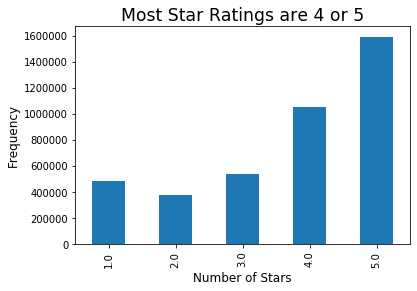

In [5]:
# Plot total number/frequency of each star rating
_ = star_cts.sort_index().plot.bar()
_ = plt.xlabel('Number of Stars', fontsize='large')
_ = plt.ylabel('Frequency', fontsize='large')
_ = plt.title('Most Star Ratings are 4 or 5', fontsize='xx-large')

plt.show()

## Question: What are the percentages of each star rating out of all ratings? ##

In [6]:
# Percentage of 1 star reviews
print('Approximately {}% of the star ratings are 1 star.'.format(round((star_cts.loc[1.0] / len(reviews)) * 100, 2)))

# Percentage of 2 star reviews
print('Approximately {}% of the star ratings are 2 stars.'.format(round((star_cts.loc[2.0] / len(reviews)) * 100, 2)))

# Percentage of 3 star reviews
print('Approximately {}% of the star ratings are 3 stars.'.format(round((star_cts.loc[3.0] / len(reviews)) * 100, 2)))

# Percentage of 4 star reviews
print('Approximately {}% of the star ratings are 4 stars.'.format(round((star_cts.loc[4.0] / len(reviews)) * 100, 2)))

# Percentage of 5 star reviews
print('Approximately {}% of the star ratings are 5 stars.'.format(round((star_cts.loc[5.0] / len(reviews)) * 100, 2)))

Approximately 11.9% of the star ratings are 1 star.
Approximately 9.36% of the star ratings are 2 stars.
Approximately 13.33% of the star ratings are 3 stars.
Approximately 26.09% of the star ratings are 4 stars.
Approximately 39.32% of the star ratings are 5 stars.


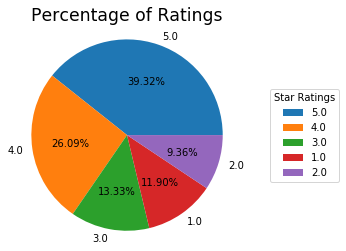

In [7]:
# Plot of percentage of ratings for each rating
_ = star_cts.plot.pie(autopct='%1.2f%%', radius=1.1)
_ = plt.ylabel('')
_ = plt.title('Percentage of Ratings', fontsize='xx-large')
_ = plt.legend(title='Star Ratings',
               loc='center right',
               bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

## Question: What is the average star rating for each restaurant? ##

In [8]:
# Group review data by business_id and calculate mean star rating for each restaurant
df = reviews.groupby(['business_id']).mean()

In [9]:
df.head()

,stars
business_id,
--1UhMGODdWsrMastO9DZw,4.076923
--6MefnULPED_I942VcFNA,3.173913
--9e1ONYQuAa-CB_Rrw7Tw,4.125680
--DaPTJW3-tB1vP-PfdTEg,3.714286
--FBCX-N37CMYDfs790Bnw,3.746479


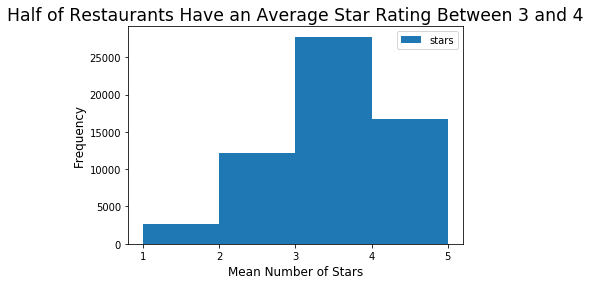

In [18]:
# Plot histogram of frequency of mean star rating for each restaurant
_ = df.plot.hist(bins=[1, 2, 3, 4, 5])
_ = plt.xticks(ticks=[1, 2, 3, 4, 5])
_ = plt.xlabel('Mean Number of Stars', fontsize='large')
_ = plt.ylabel('Frequency', fontsize='large')
_ = plt.title('Half of Restaurants Have an Average Star Rating Between 3 and 4', fontsize='xx-large')

plt.show()

In [11]:
# Percentage of restaurants whose mean star rating is between 1 and 2
print('The percentage of restaurants whose mean star rating is between 1 and 2 is approximately: {}%'
      .format(round((len(df[(df['stars'] > 1) & (df['stars'] <= 2)]) / len(df)) * 100, 2)))

# Percentage of restaurants whose mean star rating is between 2 and 3
print('The percentage of restaurants whose mean star rating is between 2 and 3 is approximately: {}%'
      .format(round((len(df[(df['stars'] > 2) & (df['stars'] <= 3)]) / len(df)) * 100, 2)))

# Percentage of restaurants whose mean star rating is between 3 and 4
print('The percentage of restaurants whose mean star rating is between 3 and 4 is approximately: {}%'
      .format(round((len(df[(df['stars'] > 3) & (df['stars'] <= 4)]) / len(df)) * 100, 2)))

# Percentage of restaurants whose mean star rating is between 4 and 5
print('The percentage of restaurants whose mean star rating is between 4 and 5 is approximately: {}%'
      .format(round((len(df[(df['stars'] > 4) & (df['stars'] <= 5)]) / len(df)) * 100, 2)))

The percentage of restaurants whose mean star rating is between 1 and 2 is approximately: 5.65%
The percentage of restaurants whose mean star rating is between 2 and 3 is approximately: 22.42%
The percentage of restaurants whose mean star rating is between 3 and 4 is approximately: 46.86%
The percentage of restaurants whose mean star rating is between 4 and 5 is approximately: 24.56%


Approximately half of all restaurants have a mean star rating between 3 and 4.

In [12]:
# Compute descriptive statistics of mean star ratings
df.describe()

,stars
count,59287.000000
mean,3.444693
std,0.797605
min,1.000000
25%,2.984791
50%,3.533333
75%,4.000000
max,5.000000


## Question: How many reviews has each restaurant received? ##

In [13]:
# Count number of reviews per restaurant
reviews_per_rest = reviews['business_id'].value_counts()
reviews_per_rest

RESDUcs7fIiihp38-d6_6g    8521
4JNXUYY8wbaaDmk3BPzlWw    8516
K7lWdNUhCbcnEvI0NhGewg    6867
f4x1YBxkLrZg652xt2KR5g    5821
cYwJA2A6I12KNkm2rtXd5g    5537
DkYS3arLOhA8si5uUEmHOw    5182
2weQS-RnoOBhb1KsHKyoSQ    4509
5LNZ67Yw9RD6nf4_UhXOjw    4509
iCQpiavjjPzJ5_3gPD5Ebg    4332
AV6weBrZFFBfRGCbcRGO4g    4185
KskYqH1Bi7Z_61pH6Om8pg    4119
El4FC8jcawUVgw_0EIcbaQ    4067
rcaPajgKOJC2vo_l3xa42A    4011
eoHdUeQDNgQ6WYEnP2aiRw    3997
OETh78qcgDltvHULowwhJg    3624
hihud--QRriCYZw1zZvW4g    3516
7sPNbCx7vGAaH7SbNPZ6oA    3488
g8OnV26ywJlZpezdBnOWUQ    3360
3kdSl5mo9dWC4clrQjEDGg    3336
XZbuPXdyA0ZtTu3AzqtQhg    3335
YJ8ljUhLsz6CtT_2ORNFmg    3293
RwMLuOkImBIqqYj4SSKSPg    3240
P7pxQFqr7yBKMMI2J51udw    3215
eAc9Vd6loOgRQolMXQt6FA    3174
yfxDa8RFOvJPQh0rNtakHA    3097
G-5kEa6E6PD5fkBRuA7k9Q    2971
fL-b760btOaGa85OJ9ut3w    2933
ujHiaprwCQ5ewziu0Vi9rw    2921
QJatAcxYgK1Zp9BRZMAx7g    2859
NvKNe9DnQavC9GstglcBJQ    2816
                          ... 
N2NOGUd_EyrnY8JoEBhFkg       1
buk0wVdm

In [14]:
# Compute descriptive statistics for number of reviews per restaurant
reviews_per_rest.describe()

count    59287.000000
mean        68.201275
std        176.910411
min          1.000000
25%          7.000000
50%         20.000000
75%         62.000000
max       8521.000000
Name: business_id, dtype: float64

## Question: What is the distribution of ratings for some specific restaurants that have multiple reviews? ##

In [26]:
# Count total number of each star rating for restaurant RESDUcs7fIiihp38-d6_6g
rest1_ratings_count = reviews[reviews['business_id'] == 'RESDUcs7fIiihp38-d6_6g'].stars.value_counts()
print('Restaurant RESDUcs7fIiihp38-d6_6g has {} total reviews.'.format(len(reviews[reviews['business_id'] == 'RESDUcs7fIiihp38-d6_6g'])))
rest1_ratings_count

Restaurant RESDUcs7fIiihp38-d6_6g has 8521 total reviews.


5.0    3376
4.0    2264
3.0    1294
1.0     828
2.0     759
Name: stars, dtype: int64

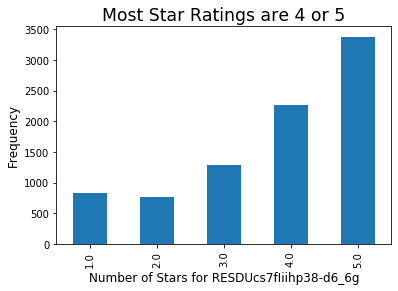

In [27]:
# Plot total number/frequency of each star rating for restaurant RESDUcs7fIiihp38-d6_6g
_ = rest1_ratings_count.sort_index().plot.bar()
_ = plt.xlabel('Number of Stars for RESDUcs7fIiihp38-d6_6g', fontsize='large')
_ = plt.ylabel('Frequency', fontsize='large')
_ = plt.title('Most Star Ratings are 4 or 5', fontsize='xx-large')

plt.show()

Note that the shape of this distribution closely resembles the shape of the distribution of all star ratings for the entire data set. It's worth analyzing some other specific restaurants to see how closely their distributions resemble this.

In [28]:
# Count total number of each star rating for restaurant 4JNXUYY8wbaaDmk3BPzlWw
rest2_ratings_count = reviews[reviews['business_id'] == '4JNXUYY8wbaaDmk3BPzlWw'].stars.value_counts()
print('Restaurant 4JNXUYY8wbaaDmk3BPzlWw has {} total reviews.'.format(len(reviews[reviews['business_id'] == '4JNXUYY8wbaaDmk3BPzlWw'])))
rest2_ratings_count

Restaurant 4JNXUYY8wbaaDmk3BPzlWw has 8516 total reviews.


5.0    3909
4.0    2882
3.0     969
2.0     455
1.0     301
Name: stars, dtype: int64

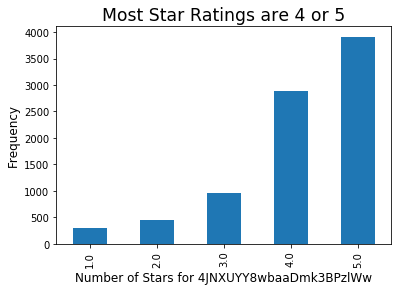

In [29]:
# Plot total number/frequency of each star rating for restaurant 4JNXUYY8wbaaDmk3BPzlWw
_ = rest2_ratings_count.sort_index().plot.bar()
_ = plt.xlabel('Number of Stars for 4JNXUYY8wbaaDmk3BPzlWw', fontsize='large')
_ = plt.ylabel('Frequency', fontsize='large')
_ = plt.title('Most Star Ratings are 4 or 5', fontsize='xx-large')

plt.show()

In [30]:
# Count total number of each star rating for restaurant NvKNe9DnQavC9GstglcBJQ
rest3_ratings_count = reviews[reviews['business_id'] == 'NvKNe9DnQavC9GstglcBJQ'].stars.value_counts()
print('Restaurant NvKNe9DnQavC9GstglcBJQ has {} total reviews.'.format(len(reviews[reviews['business_id'] == 'NvKNe9DnQavC9GstglcBJQ'])))
rest3_ratings_count

Restaurant NvKNe9DnQavC9GstglcBJQ has 2816 total reviews.


4.0    1118
5.0     963
3.0     438
2.0     149
1.0     148
Name: stars, dtype: int64

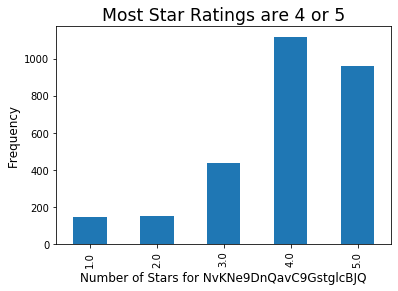

In [31]:
# Plot total number/frequency of each star rating for restaurant NvKNe9DnQavC9GstglcBJQ
_ = rest3_ratings_count.sort_index().plot.bar()
_ = plt.xlabel('Number of Stars for NvKNe9DnQavC9GstglcBJQ', fontsize='large')
_ = plt.ylabel('Frequency', fontsize='large')
_ = plt.title('Most Star Ratings are 4 or 5', fontsize='xx-large')

plt.show()

Let's compare these three restaurants in a single DataFrame and plot.

In [44]:
# Construct DataFrame with ratings counts for all three restaurants
ratings_count_df = pd.concat([rest1_ratings_count, rest2_ratings_count, rest3_ratings_count], axis=1)
ratings_count_df.columns = ['RESDUcs7fIiihp38-d6_6g', '4JNXUYY8wbaaDmk3BPzlWw', 'NvKNe9DnQavC9GstglcBJQ']
ratings_count_df

,RESDUcs7fIiihp38-d6_6g,4JNXUYY8wbaaDmk3BPzlWw,NvKNe9DnQavC9GstglcBJQ
1.0,828,301,148
2.0,759,455,149
3.0,1294,969,438
4.0,2264,2882,1118
5.0,3376,3909,963


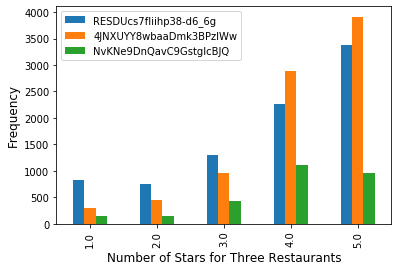

In [48]:
# Plot total number/frequency of each star rating for all three restaurants
_ = ratings_count_df.sort_index().plot.bar()
_ = plt.xlabel('Number of Stars for Three Restaurants', fontsize='large')
_ = plt.ylabel('Frequency', fontsize='large')

plt.show()

## Question: What is the distribution of the length of the reviews? ##
For simplicity, I will use number of characters (including letters, spaces, punctuation, etc.) as the metric for length of a review. This metric will be useful as an approximation of length.

In [56]:
# Construct series of review lengths (measured in terms of number of characters in review)
review_lens = reviews['text'].str.len()
review_lens

0           823
1           534
2           124
3           353
4           499
5            87
6           406
7           170
8            99
9           512
10          148
11          298
12          563
13          554
14          138
15          111
16         1697
17          100
18          688
19         1517
20          806
21         1167
22         2930
23          236
24          225
25           78
26          316
27          195
28         2627
29          487
           ... 
4043419     379
4043420     409
4043421     180
4043422     207
4043423     402
4043424     812
4043425     444
4043426    1297
4043427     148
4043428     122
4043429     385
4043430    2567
4043431     606
4043432     626
4043433     747
4043434     319
4043435     119
4043436     470
4043437     515
4043438     641
4043439     302
4043440     505
4043441     115
4043442     957
4043443     941
4043444     569
4043445      87
4043446     185
4043447     715
4043448     810
Name: text, Length: 4043

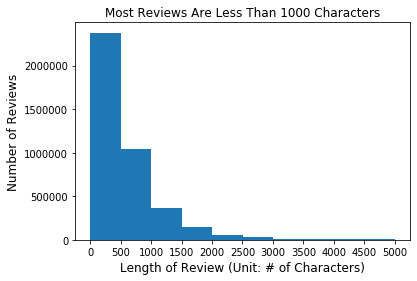

In [70]:
# Construct histogram plot of review lengths
_ = review_lens.plot.hist()
_ = plt.xticks(ticks=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])
_ = plt.xlabel('Length of Review (Unit: # of Characters)', fontsize='large')
_ = plt.ylabel('Number of Reviews', fontsize='large')
_ = plt.title('Most Reviews Are Less Than 1000 Characters', fontsize='large')

plt.show()

## Question: What is the relationship between rating and review length? ##

In [86]:
# Construct new DataFrame with review lengths added as a column
review_lens_df = reviews.copy()
review_lens_df['review_lengths'] = review_lens
review_lens_df.head()

,business_id,stars,text,review_lengths
0,EXAbfr5PkoRzMqlCb_3ALQ,5.0,We were in town from San Francisco to visit fr...,823
1,6sOBPz69VLgIvNAY7dowOg,2.0,I bought a Dealfind voucher and decided to giv...,534
2,VMXl3Dm1Nwvgwo1PVYTXbg,5.0,Fun club!! Great place to hang out and a real...,124
3,yNPh5SO-7wr8HPpVCDPbXQ,5.0,After our horrible customer service next door ...,353
4,L0aSDVHNXCl6sY4cfZQ-5Q,1.0,"If I could give this place zero stars, I would...",499


In [117]:
len_stats = review_lens_df.groupby('stars').agg([np.mean, np.median])
len_stats

review_lengths       
                mean median
stars                      
1.0       669.122246    479
2.0       734.363719    551
3.0       701.818360    533
4.0       615.932487    449
5.0       469.145701    320

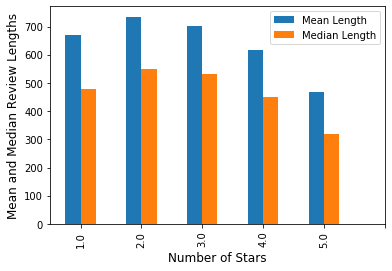

In [145]:
_ = len_stats.plot.bar()
_ = plt.xticks(range(6))
_ = plt.xlabel('Number of Stars', fontsize='large')
_ = plt.ylabel('Mean and Median Review Lengths', fontsize='large')
_ = plt.legend(['Mean Length', 'Median Length'])

plt.show()

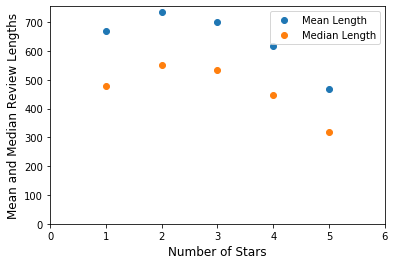

In [146]:
_ = len_stats.plot(marker='.', linestyle='', ms=12)
_ = plt.xticks(range(7))
_ = plt.yticks([0, 100, 200, 300, 400, 500, 600, 700])
_ = plt.xlabel('Number of Stars', fontsize='large')
_ = plt.ylabel('Mean and Median Review Lengths', fontsize='large')
_ = plt.legend(['Mean Length', 'Median Length'])

plt.show()